## Data Preprocessing and Description of KKBox Dataset

[WSDM KKBox's Churn Prediction Challenge](https://www.kaggle.com/c/kkbox-churn-prediction-challenge)

## The Business Problem

KKBox is the leader in music streaming in Asia and their business model is based on paid user accounts and advertising revenue with the former being a significant contributor. The client (KKBox) wants a predictive model of customer churn built.

In [1]:
# Importing pandas et al is a given for data scientists working with flat files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
members = pd.read_csv('members.csv')
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,URiXrfYPzHAlk+7+n7BOMl9G+T7g8JmrSnT/BU8GmEo=,1,0,NaN,9,20150525,20150526
1,U1q0qCqK/lDMTD2kN8G9OXMtfuvLCey20OAIPOvXXGQ=,1,0,NaN,4,20161221,20161224
2,W6M2H2kAoN9ahfDYKo3J6tmsJRAeuFc9wl1cau5VL1Q=,1,0,NaN,4,20160306,20160309
3,1qE5+cN7CUyC+KFH6gBZzMWmM1QpIVW6A43BEm98I/w=,5,17,female,4,20161031,20161107
4,SeAnaZPI+tFdAt+r3lZt/B8PgTp7bcG/1os39u4pLxs=,1,0,NaN,4,20170202,20170205


In [3]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116194 entries, 0 to 5116193
Data columns (total 7 columns):
msno                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
expiration_date           int64
dtypes: int64(5), object(2)
memory usage: 273.2+ MB


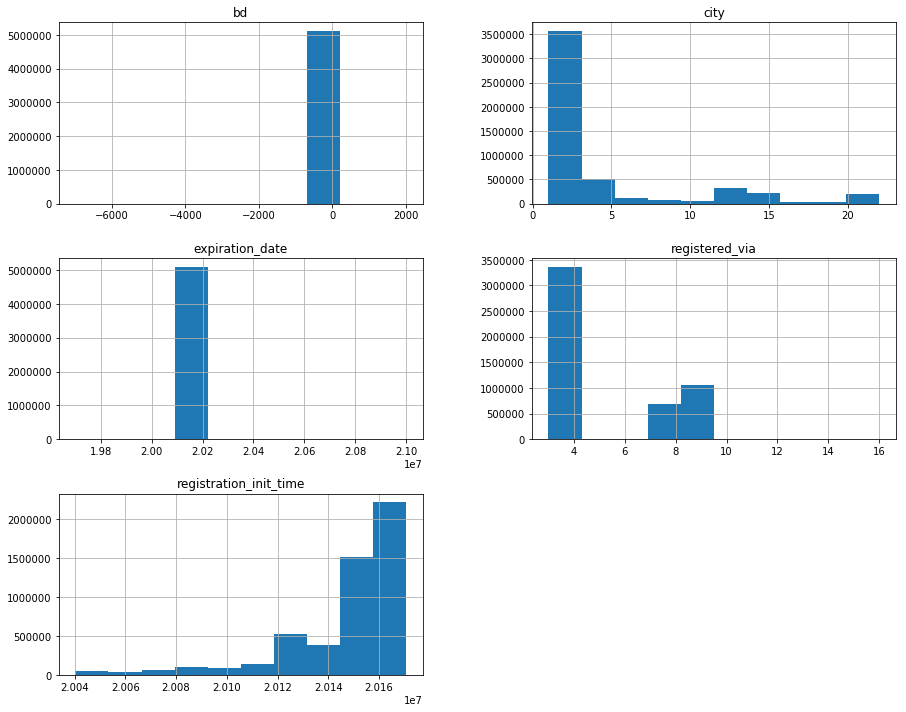

In [4]:
members.hist(bins=10, figsize=(15,12))
plt.show()

## The Problem Statement

We have subscriber data, transaction data, and user listening behavior each in separate csv's. The three files combined total about 35 GB of data. What is the most efficient way to merge these datasets and ease the knowledge discovery process?

## Our Approach

- We will attempt to reduce the physical memory requirements of each file prior to merging.
- We will investigate batch loading of subsets of our datasets.
- We will explore the use of a standalone application to ease preprocessing.

## Quality Concerns

- We expect invalid observations in the age variable ( bd < 0)
- We also expect an imperfect merge of the three datasets by user id (msno)